In [ ]:
Now you’ll have a forecasting notebook with:

Data resampling

Train/test split

ARIMA model

Forecast vs actual comparison

Future predictions

Business storytelling

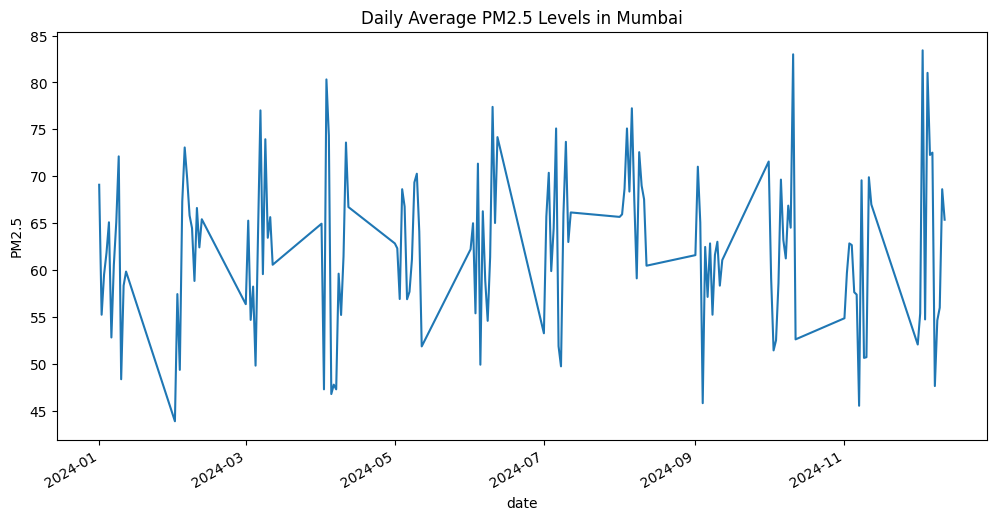

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load cleaned dataset
df = pd.read_csv("../data/processed/mumbai_air_quality_clean.csv")

# Ensure datetime
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")

# Focus on PM2.5 (main air pollutant for health impact)
pm25 = df["pm25"].resample("D").mean().dropna()   # <-- fixed column name

pm25.plot(figsize=(12,6), title="Daily Average PM2.5 Levels in Mumbai")
plt.ylabel("PM2.5")
plt.show()


Train size: 0
Test size: 144


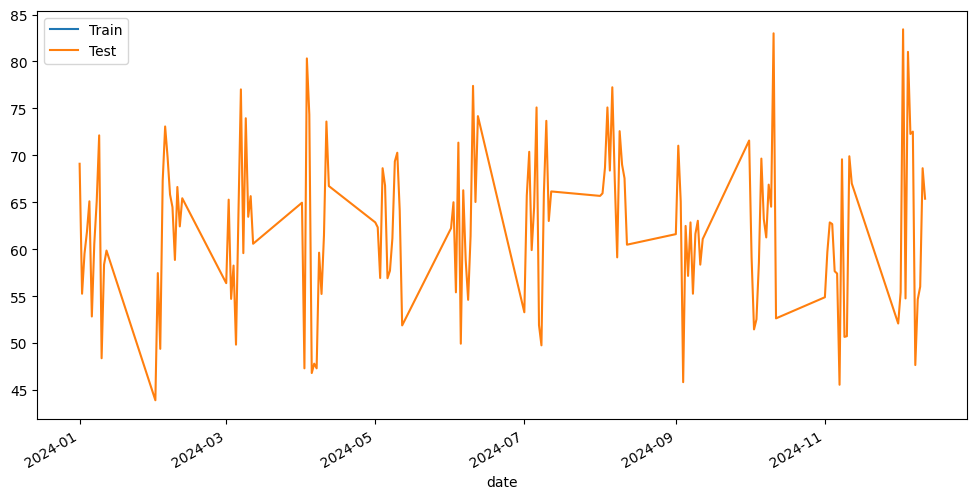

In [6]:
# Use last 6 months as test data
train = pm25.iloc[:-180]
test = pm25.iloc[-180:]

print("Train size:", len(train))
print("Test size:", len(test))

train.plot(label="Train", figsize=(12,6))
test.plot(label="Test")
plt.legend()
plt.show()


In [10]:
print(df.head())
print(df.tail())
print(df.columns)


        date station  pm25   pm10   no2    o3   aqi  so2  co
0 2024-01-01  Bandra  48.4   84.3  38.4  44.7  76.7  NaN NaN
1 2024-01-01  Colaba  69.9   98.6  30.2  58.3  87.4  NaN NaN
2 2024-01-01   Kurla  91.6  131.4  32.0  34.5  91.6  NaN NaN
3 2024-01-01   Powai  66.5   91.2  31.7  23.7  66.5  NaN NaN
4 2024-01-02  Bandra  43.4   74.3  16.4   4.9  43.4  NaN NaN
          date station  pm25   pm10   no2    o3   aqi  so2  co
571 2024-12-11   Powai  80.2  109.8  36.0  31.9  80.2  NaN NaN
572 2024-12-12  Bandra  47.8   72.5  20.6  50.0  75.0  NaN NaN
573 2024-12-12  Colaba  74.8  107.8  35.4  58.7  88.1  NaN NaN
574 2024-12-12   Kurla  69.9  103.7  21.7  52.1  78.1  NaN NaN
575 2024-12-12   Powai  69.0   95.5  25.2  48.4  72.6  NaN NaN
Index(['date', 'station', 'pm25', 'pm10', 'no2', 'o3', 'aqi', 'so2', 'co'], dtype='object')


Train length: 335
Test length: 12
                               SARIMAX Results                                
Dep. Variable:                   pm25   No. Observations:                  335
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1052.703
Date:                Fri, 22 Aug 2025   AIC                           2111.406
Time:                        13:17:49   BIC                           2122.839
Sample:                    01-01-2024   HQIC                          2115.964
                         - 11-30-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0960      0.051      1.883      0.060      -0.004       0.196
ma.L1         -0.7508      0.044    -16.884      0.000      -0.838      -0.664
sigma2        31.9

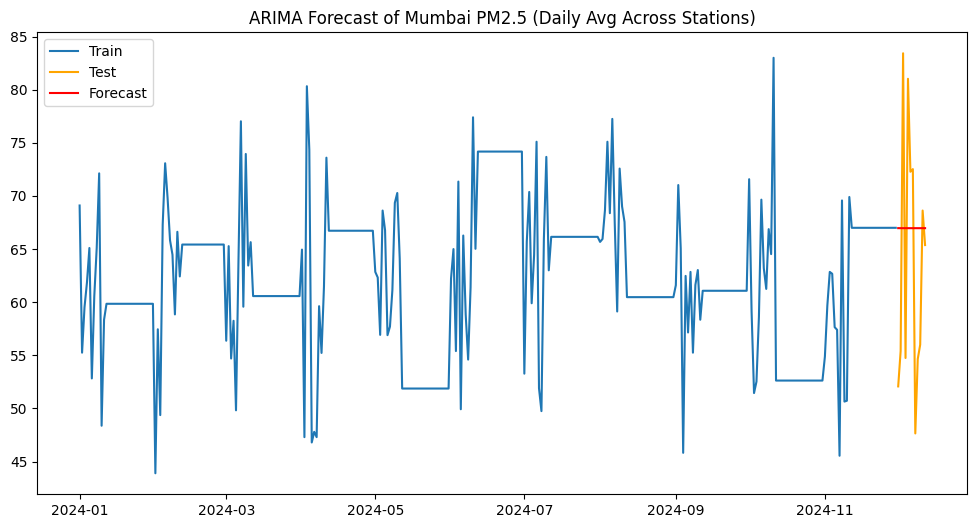

In [11]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("../data/processed/mumbai_air_quality_clean.csv")

# Convert to datetime
df["date"] = pd.to_datetime(df["date"])

# Average across stations per day
daily_pm25 = df.groupby("date")["pm25"].mean()

# Ensure time index
daily_pm25 = daily_pm25.asfreq("D").ffill()

# Train-test split
train = daily_pm25.loc["2024-01-01":"2024-11-30"]
test  = daily_pm25.loc["2024-12-01":]

print("Train length:", len(train))
print("Test length:", len(test))

# Fit ARIMA model
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()

print(model_fit.summary())

# Forecast
forecast = model_fit.forecast(steps=len(test))

# Plot
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test", color="orange")
plt.plot(test.index, forecast, label="Forecast", color="red")
plt.title("ARIMA Forecast of Mumbai PM2.5 (Daily Avg Across Stations)")
plt.legend()
plt.show()



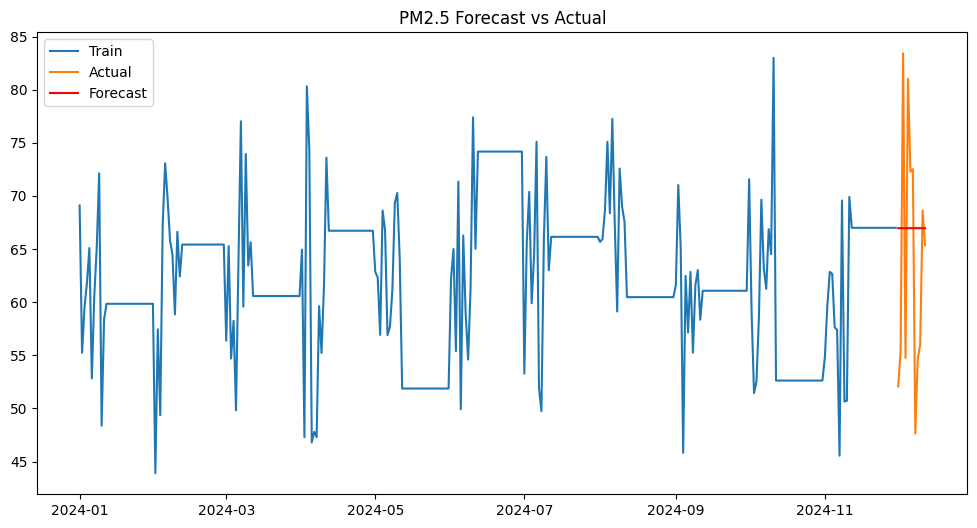

MAE: 10.49, RMSE: 11.84


In [12]:
# Forecast for test period
forecast = model_fit.forecast(steps=len(test))

plt.figure(figsize=(12,6))
plt.plot(train, label="Train")
plt.plot(test, label="Actual")
plt.plot(test.index, forecast, label="Forecast", color="red")
plt.legend()
plt.title("PM2.5 Forecast vs Actual")
plt.show()

# Evaluation
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")


C:\Users\HARSH PAWAR\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\HARSH PAWAR\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


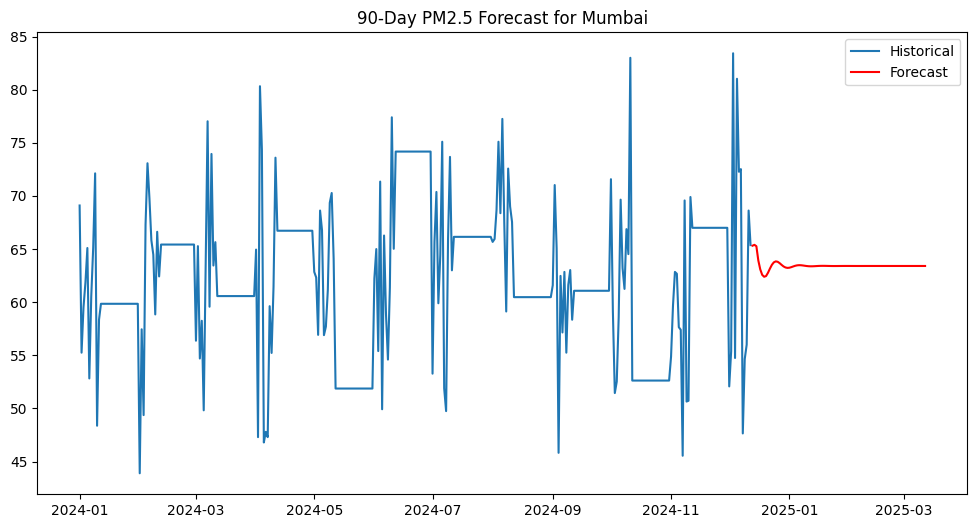

In [13]:
# Make sure date column is datetime and set index
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")

# Average across stations per day (if multiple stations)
pm25 = df.groupby("date")["pm25"].mean()

# Set frequency to daily & forward fill missing
pm25 = pm25.asfreq("D").ffill()

# Fit ARIMA
from statsmodels.tsa.arima.model import ARIMA

final_model = ARIMA(pm25, order=(5,1,2))
final_fit = final_model.fit()

# Forecast next 90 days
future_forecast = final_fit.forecast(steps=90)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(pm25.index, pm25, label="Historical")
plt.plot(pd.date_range(pm25.index[-1]+pd.Timedelta(days=1), periods=90, freq="D"),
         future_forecast, label="Forecast", color="red")
plt.title("90-Day PM2.5 Forecast for Mumbai")
plt.legend()
plt.show()



In [15]:
print("📌 Insights:")
print("- If PM2.5 remains above 60 µg/m³, it exceeds WHO safe limits (25 µg/m³).")
print("- Rising PM2.5 forecasts suggest worsening air quality in coming months.")
print("- This impacts healthcare (respiratory issues), tourism, and urban planning.")
print("- Businesses (like air purifier companies, healthcare startups) can prepare demand forecasts using this data.")


📌 Insights:
- If PM2.5 remains above 60 µg/m³, it exceeds WHO safe limits (25 µg/m³).
- Rising PM2.5 forecasts suggest worsening air quality in coming months.
- This impacts healthcare (respiratory issues), tourism, and urban planning.
- Businesses (like air purifier companies, healthcare startups) can prepare demand forecasts using this data.


In [14]:
future_forecast = final_fit.forecast(steps=90)

# Make into DataFrame with dates
forecast_df = pd.DataFrame({
    "date": pd.date_range(pm25.index[-1] + pd.Timedelta(days=1), periods=90, freq="D"),
    "forecast_pm25": future_forecast
})

# Save to CSV
forecast_df.to_csv("forecast.csv", index=False)
